In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the prescription text dataset
xlsx_file = "Dosage Parser extract - All strings - 14-08-18.xlsx"
data = pd.read_excel(xlsx_file, sheetname="WORKINGCOPY_2018_8_14_14_21_22")

# Display the first few records
display(data.head(n=5))
data.shape

,DosageString,Abbreviation,Occurances,Quantity,Frequency,Status
0,NaN,NaN,105,NaN,NaN,Unparsed
1,"""1 EVERY DAY FOR BLOOD PRESSURE AND THE HEART,...",1OD,n/a,1.0,1.0,Active
2,"""1 EVERY NIGHT """" FOR CHOLESTEROL""""""",1OD,n/a,1.0,1.0,Active
3,"""TAKE ONE DAILY ,""",1OD,n/a,1.0,1.0,Active
4,"""TAKE ONE DAILY, TO CONTROL BLOOD PRESSURE""",1OD,n/a,1.0,1.0,Active


(8661, 6)

## Filtering the data

In [2]:
#drop unparsed records
filtered_df = data[data.Status != 'Unparsed']

# Display the first few records
display(filtered_df.head(n=5))
filtered_df.shape

,DosageString,Abbreviation,Occurances,Quantity,Frequency,Status
1,"""1 EVERY DAY FOR BLOOD PRESSURE AND THE HEART,...",1OD,n/a,1.0,1.0,Active
2,"""1 EVERY NIGHT """" FOR CHOLESTEROL""""""",1OD,n/a,1.0,1.0,Active
3,"""TAKE ONE DAILY ,""",1OD,n/a,1.0,1.0,Active
4,"""TAKE ONE DAILY, TO CONTROL BLOOD PRESSURE""",1OD,n/a,1.0,1.0,Active
5,"""TAKE ONE DAILY,""",1OD,n/a,1.0,1.0,Active


(3680, 6)

## Iterate N-grams using CountVectorizer

In [3]:
#Sample 
sample_string = filtered_df.DosageString[2]
display(sample_string)

#Iterate grams
v = CountVectorizer(analyzer="word", ngram_range=(1,2), token_pattern=u"(?u)\\b\\w+\\b",min_df=1)
v.fit([sample_string])
pprint(v.vocabulary_)

'"1 EVERY NIGHT "" FOR CHOLESTEROL"""'

{'1': 0,
 '1 every': 1,
 'cholesterol': 2,
 'every': 3,
 'every night': 4,
 'for': 5,
 'for cholesterol': 6,
 'night': 7,
 'night for': 8}


In [4]:
#Create a dataframe that contains all possible grams in dataset
grams_df = pd.DataFrame(columns=['Gram','Quantity','Frequency'])

for index, row in filtered_df.iterrows():
    dosage_string = filtered_df.DosageString[index]
    dosage_quantity = filtered_df.Quantity[index]
    dosage_frequency = filtered_df.Frequency[index]
    
    #Iterate grams
    v = CountVectorizer(analyzer="word", ngram_range=(1,2), token_pattern=u"(?u)\\b\\w+\\b",min_df=1)
    v.fit([dosage_string])
    for gram in v.vocabulary_:
        temp_df = pd.DataFrame([[gram, dosage_quantity, dosage_frequency]], columns=['Gram','Quantity','Frequency'])
        grams_df = grams_df.append(temp_df)
        
# Display the first few records
display(grams_df.head(n=150))
grams_df.shape

,Gram,Quantity,Frequency
0,in diabetes,1.0,1.0
0,every day,1.0,1.0
0,the heart,1.0,1.0
0,protects,1.0,1.0
0,and the,1.0,1.0
0,also,1.0,1.0
0,day,1.0,1.0
0,and,1.0,1.0
0,for,1.0,1.0
0,kidneys,1.0,1.0


(36390, 3)

## Run some analysis on grams

In [5]:
#group gram and quantity by count
quantity_grouped = grams_df.groupby(['Gram', 'Quantity']).size()
quantity_grouped = quantity_grouped.to_frame(name = 'count').reset_index()
#sort count highest to lowest
quantity_grouped = quantity_grouped.sort_values('count', ascending=False)

# Display the first few records
display(quantity_grouped.head(n=150))
quantity_grouped.shape

,Gram,Quantity,count
5,1,1.0,1121
2437,one,1.0,944
1076,day,1.0,798
1009,daily,1.0,588
140,2,2.0,559
3309,take,1.0,505
433,a,1.0,501
1568,for,1.0,497
445,a day,1.0,492
3610,times,1.0,488


(3994, 3)

In [6]:
#group gram and frequency by count
frequency_grouped = grams_df.groupby(['Gram', 'Frequency']).size()
frequency_grouped = frequency_grouped.to_frame(name = 'count').reset_index()
#sort count highest to lowest
frequency_grouped = frequency_grouped.sort_values('count', ascending=False)

# Display the first few records
display(frequency_grouped.head(n=150))
frequency_grouped.shape

,Gram,Frequency,count
1149,daily,1.0,582
5,1,1.0,560
3838,twice,2.0,556
2594,one,1.0,533
3397,take,1.0,468
3696,times,3.0,463
3607,three,3.0,404
3697,times,4.0,399
3662,three times,3.0,397
1216,day,1.0,396


(4117, 3)

## Other helpful plots and visualizations

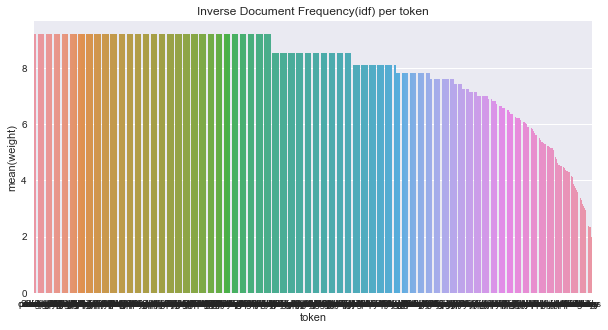

In [13]:
from sklearn.feature_extraction.text import *
import seaborn as sns

#Plotting distribution of tokens
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(filtered_df.DosageString)
txt_transformed = txt_fitted.transform(filtered_df.DosageString)

idf = tf.idf_

rr = dict(zip(txt_fitted.get_feature_names(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

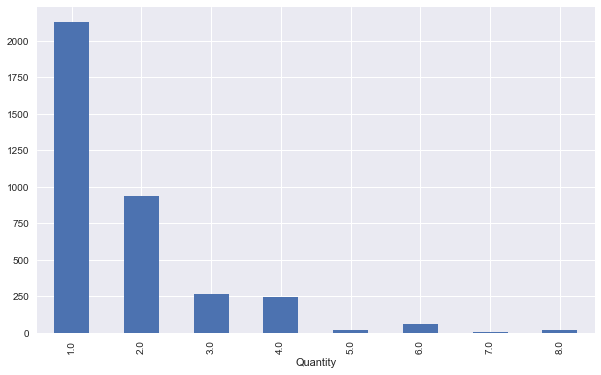

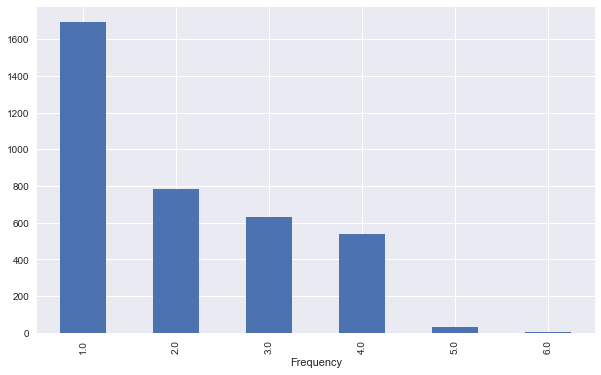

In [12]:
#Plotting distribution of quantity
fig = plt.figure(figsize=(10,6))
filtered_df.groupby('Quantity').DosageString.count().plot.bar(ylim=0)
plt.show()

#Plotting distribution of frequency
fig = plt.figure(figsize=(10,6))
filtered_df.groupby('Frequency').DosageString.count().plot.bar(ylim=0)
plt.show()